<a href="https://colab.research.google.com/github/kari-hub/Week-9-Project/blob/master/Data_Science_Cohort_3_Week_9_project_dataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam Dataset.

> We have been provided with a dataset which contains the frequency of some words in an email. Use this data to classify an email as spam or not spam.

## Solution



> We will use Naive Bayes classifier to create a model than can accurately classifier an email message as spam or not.

## Defining the question


### a) Specifying the question



> Predicting whether an email message is a spam or not

### b) Defining the metric of success



> Obtaining a mean squared error of less than the squared mean value for our label column.

### c) Understanding the context



> Our data contains 58 columns which show the frequency with which each word occurs in an email.

### d) Recording the experimental design



1. Performing EDA
2. Checking for multicollinearity
3. Creating our model
4. Evaluating the performance of our models
5. Challenging the solution

### e) Data Relevance



> Our dataset is relevant to the question and to the analysis to be carried out.

### f) Appropriateness of data



> Our data will require some normalization and data cleaning before being used to create our predction models

## Reading the data



In [ ]:
# Importing our libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Loading our dataset

spam = pd.read_csv('/content/spam.csv')


## Checking Data



In [ ]:
# Previewing the top of our data

spam.head()

,wor1d_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,word_freq_mail:.1,word_freq_receive:,word_freq_will:,word_freq_people:,word_freq_report:,word_freq_addresses:,word_freq_free:,word_freq_business:,word_freq_email:,word_freq_you:,word_freq_credit:,word_freq_your:,word_freq_font:,word_freq_000:,word_freq_money:,word_freq_hp:,word_freq_hpl:,word_freq_george:,word_freq_650:,word_freq_lab:,word_freq_labs:,word_freq_telnet:,word_freq_857:,word_freq_data:,word_freq_415:,word_freq_85:,word_freq_technology:,word_freq_1999:,word_freq_parts:,word_freq_pm:,word_freq_direct:,word_freq_cs:,word_freq_meeting:,word_freq_original:,word_freq_project:,word_freq_re:,word_freq_edu:,word_freq_table:,word_freq_conference:,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
# Previewing the bottom of our dataset

spam.tail()

,wor1d_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,word_freq_mail:.1,word_freq_receive:,word_freq_will:,word_freq_people:,word_freq_report:,word_freq_addresses:,word_freq_free:,word_freq_business:,word_freq_email:,word_freq_you:,word_freq_credit:,word_freq_your:,word_freq_font:,word_freq_000:,word_freq_money:,word_freq_hp:,word_freq_hpl:,word_freq_george:,word_freq_650:,word_freq_lab:,word_freq_labs:,word_freq_telnet:,word_freq_857:,word_freq_data:,word_freq_415:,word_freq_85:,word_freq_technology:,word_freq_1999:,word_freq_parts:,word_freq_pm:,word_freq_direct:,word_freq_cs:,word_freq_meeting:,word_freq_original:,word_freq_project:,word_freq_re:,word_freq_edu:,word_freq_table:,word_freq_conference:,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [ ]:
# Determining the number of records in our data

spam.shape

(4601, 58)

In [ ]:
# Calculating numerical information on our data

spam.describe()

,wor1d_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,word_freq_mail:.1,word_freq_receive:,word_freq_will:,word_freq_people:,word_freq_report:,word_freq_addresses:,word_freq_free:,word_freq_business:,word_freq_email:,word_freq_you:,word_freq_credit:,word_freq_your:,word_freq_font:,word_freq_000:,word_freq_money:,word_freq_hp:,word_freq_hpl:,word_freq_george:,word_freq_650:,word_freq_lab:,word_freq_labs:,word_freq_telnet:,word_freq_857:,word_freq_data:,word_freq_415:,word_freq_85:,word_freq_technology:,word_freq_1999:,word_freq_parts:,word_freq_pm:,word_freq_direct:,word_freq_cs:,word_freq_meeting:,word_freq_original:,word_freq_project:,word_freq_re:,word_freq_edu:,word_freq_table:,word_freq_conference:,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000

In [ ]:
# Determining the dataypes for our columns

spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   wor1d_freq_make:             4601 non-null   float64
 1   word_freq_address:           4601 non-null   float64
 2   word_freq_all:               4601 non-null   float64
 3   word_freq_3d:                4601 non-null   float64
 4   word_freq_our:               4601 non-null   float64
 5   word_freq_over:              4601 non-null   float64
 6   word_freq_remove:            4601 non-null   float64
 7   word_freq_internet:          4601 non-null   float64
 8   word_freq_order:             4601 non-null   float64
 9   word_freq_mail:              4601 non-null   float64
 10  word_freq_mail:.1            4601 non-null   float64
 11  word_freq_receive:           4601 non-null   float64
 12  word_freq_will:              4601 non-null   float64
 13  word_freq_people: 

## Tidying the dataset



In [ ]:
# Checking for null values

spam.isnull().sum()

wor1d_freq_make:               0
word_freq_address:             0
word_freq_all:                 0
word_freq_3d:                  0
word_freq_our:                 0
word_freq_over:                0
word_freq_remove:              0
word_freq_internet:            0
word_freq_order:               0
word_freq_mail:                0
word_freq_mail:.1              0
word_freq_receive:             0
word_freq_will:                0
word_freq_people:              0
word_freq_report:              0
word_freq_addresses:           0
word_freq_free:                0
word_freq_business:            0
word_freq_email:               0
word_freq_you:                 0
word_freq_credit:              0
word_freq_your:                0
word_freq_font:                0
word_freq_000:                 0
word_freq_money:               0
word_freq_hp:                  0
word_freq_hpl:                 0
word_freq_george:              0
word_freq_650:                 0
word_freq_lab:                 0
word_freq_

In [ ]:
# Checking for duplicated values

spam.duplicated().sum()

391

In [ ]:
# Dropping duplicated values in our data

spam.drop_duplicates(inplace=True)

In [ ]:
# Confirming whether we have dropped all duplicated values

spam.duplicated().values.sum()

0

In [ ]:
# Previewing our columns

spam.columns

Index(['wor1d_freq_make:', 'word_freq_address:', 'word_freq_all:',
       'word_freq_3d:', 'word_freq_our:', 'word_freq_over:',
       'word_freq_remove:', 'word_freq_internet:', 'word_freq_order:',
       'word_freq_mail:', 'word_freq_mail:.1', 'word_freq_receive:',
       'word_freq_will:', 'word_freq_people:', 'word_freq_report:',
       'word_freq_addresses:', 'word_freq_free:', 'word_freq_business:',
       'word_freq_email:', 'word_freq_you:', 'word_freq_credit:',
       'word_freq_your:', 'word_freq_font:', 'word_freq_000:',
       'word_freq_money:', 'word_freq_hp:', 'word_freq_hpl:',
       'word_freq_george:', 'word_freq_650:', 'word_freq_lab:',
       'word_freq_labs:', 'word_freq_telnet:', 'word_freq_857:',
       'word_freq_data:', 'word_freq_415:', 'word_freq_85:',
       'word_freq_technology:', 'word_freq_1999:', 'word_freq_parts:',
       'word_freq_pm:', 'word_freq_direct:', 'word_freq_cs:',
       'word_freq_meeting:', 'word_freq_original:', 'word_freq_project:',
   

In [ ]:
# Dealing with any white spaces in the data
for col in spam.columns:
    try:
        spam.col.str.strip()
    except:
        print(f"{col} column din't have white spaces.")

wor1d_freq_make: column din't have white spaces.
word_freq_address: column din't have white spaces.
word_freq_all: column din't have white spaces.
word_freq_3d: column din't have white spaces.
word_freq_our: column din't have white spaces.
word_freq_over: column din't have white spaces.
word_freq_remove: column din't have white spaces.
word_freq_internet: column din't have white spaces.
word_freq_order: column din't have white spaces.
word_freq_mail: column din't have white spaces.
word_freq_mail:.1 column din't have white spaces.
word_freq_receive: column din't have white spaces.
word_freq_will: column din't have white spaces.
word_freq_people: column din't have white spaces.
word_freq_report: column din't have white spaces.
word_freq_addresses: column din't have white spaces.
word_freq_free: column din't have white spaces.
word_freq_business: column din't have white spaces.
word_freq_email: column din't have white spaces.
word_freq_you: column din't have white spaces.
word_freq_credi

In [ ]:
# Checking for outliers

def detect_outlier(spam):
  outliers = []
  threshold = 3
  mean_1 = np.mean(spam)
  std_1 = np.std(spam)

  for y in spam:
    z_score = (y - mean_1)/std_1
    if np.abs(z_score) > threshold:
      outliers.append(y)
  return outliers 

In [ ]:
# Counting the number of outliers in our data and their percentages

for col in spam:
  rows, columns = spam.shape
  percent_coefficient = float(100 / rows)
  outliers = detect_outlier(spam[col])
  outliers_count = len(outliers)
  outliers_percentage = outliers_count * percent_coefficient
  print(f"{col} has {outliers_count} outliers in total, which is{outliers_percentage:.2}% of data" )

wor1d_freq_make: has 80 outliers in total, which is1.9% of data
word_freq_address: has 53 outliers in total, which is1.3% of data
word_freq_all: has 85 outliers in total, which is2.0% of data
word_freq_3d: has 12 outliers in total, which is0.29% of data
word_freq_our: has 74 outliers in total, which is1.8% of data
word_freq_over: has 94 outliers in total, which is2.2% of data
word_freq_remove: has 90 outliers in total, which is2.1% of data
word_freq_internet: has 70 outliers in total, which is1.7% of data
word_freq_order: has 100 outliers in total, which is2.4% of data
word_freq_mail: has 68 outliers in total, which is1.6% of data
word_freq_mail:.1 has 102 outliers in total, which is2.4% of data
word_freq_receive: has 97 outliers in total, which is2.3% of data
word_freq_will: has 80 outliers in total, which is1.9% of data
word_freq_people: has 95 outliers in total, which is2.3% of data
word_freq_report: has 83 outliers in total, which is2.0% of data
word_freq_addresses: has 67 outliers

In [ ]:
# Dropping outliers from our data
from scipy import stats

z = np.abs(stats.zscore(spam))
print(z)

[[0.34792164 1.16102457 0.67588944 ... 0.04439849 0.02130997 1.22778048]
 [0.3521501  0.3684328  0.40439129 ... 0.24484101 1.1911417  1.22778048]
 [0.14790114 0.24802746 0.81163851 ... 2.16908914 3.18117903 1.22778048]
 ...
 [0.65218084 0.24802746 0.01653679 ... 0.23120996 0.27996632 0.81447785]
 [2.85240628 0.24802746 0.56524496 ... 0.23622103 0.34463041 0.81447785]
 [0.34792164 0.24802746 0.69528216 ... 0.23622103 0.40606129 0.81447785]]


In [ ]:
# Confirming that our outliers have been dropped 
df = spam[(z < 3).all(axis=1)]

print(f"Previous dataframe size : {spam.shape[0]}")
print(f"New dataframe : {df.shape[0]}")

Previous dataframe size : 4210
New dataframe : 2057


In [ ]:
# Saving our data without outliers

df.to_csv('new_data.csv')

In [ ]:
# Loading the cleaned dataset

spam = pd.read_csv('new_data.csv')


## Exploratory Data Analysis



In [ ]:
# Previewing our cleaned dataset

spam.head()

,Unnamed: 0,wor1d_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,word_freq_mail:.1,word_freq_receive:,word_freq_will:,word_freq_people:,word_freq_report:,word_freq_addresses:,word_freq_free:,word_freq_business:,word_freq_email:,word_freq_you:,word_freq_credit:,word_freq_your:,word_freq_font:,word_freq_000:,word_freq_money:,word_freq_hp:,word_freq_hpl:,word_freq_george:,word_freq_650:,word_freq_lab:,word_freq_labs:,word_freq_telnet:,word_freq_857:,word_freq_data:,word_freq_415:,word_freq_85:,word_freq_technology:,word_freq_1999:,word_freq_parts:,word_freq_pm:,word_freq_direct:,word_freq_cs:,word_freq_meeting:,word_freq_original:,word_freq_project:,word_freq_re:,word_freq_edu:,word_freq_table:,word_freq_conference:,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,0.00,0.64,0.25,0.00,0.12,0.00,0.00,0.12,1.67,0.06,0.71,0.0,0.19,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.06,0.0,0.0,0.0,0.0,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1


In [ ]:
# Dropping the unnamed column

spam = spam.drop(columns=['Unnamed: 0'])
spam

,wor1d_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,word_freq_mail:.1,word_freq_receive:,word_freq_will:,word_freq_people:,word_freq_report:,word_freq_addresses:,word_freq_free:,word_freq_business:,word_freq_email:,word_freq_you:,word_freq_credit:,word_freq_your:,word_freq_font:,word_freq_000:,word_freq_money:,word_freq_hp:,word_freq_hpl:,word_freq_george:,word_freq_650:,word_freq_lab:,word_freq_labs:,word_freq_telnet:,word_freq_857:,word_freq_data:,word_freq_415:,word_freq_85:,word_freq_technology:,word_freq_1999:,word_freq_parts:,word_freq_pm:,word_freq_direct:,word_freq_cs:,word_freq_meeting:,word_freq_original:,word_freq_project:,word_freq_re:,word_freq_edu:,word_freq_table:,word_freq_conference:,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,0.00,0.64,0.25,0.00,0.12,0.00,0.00,0.12,1.67,0.06,0.71,0.0,0.19,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.06,0.00,0.00,0.0,0.0,0.040,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
2053,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
2054,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
2055,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


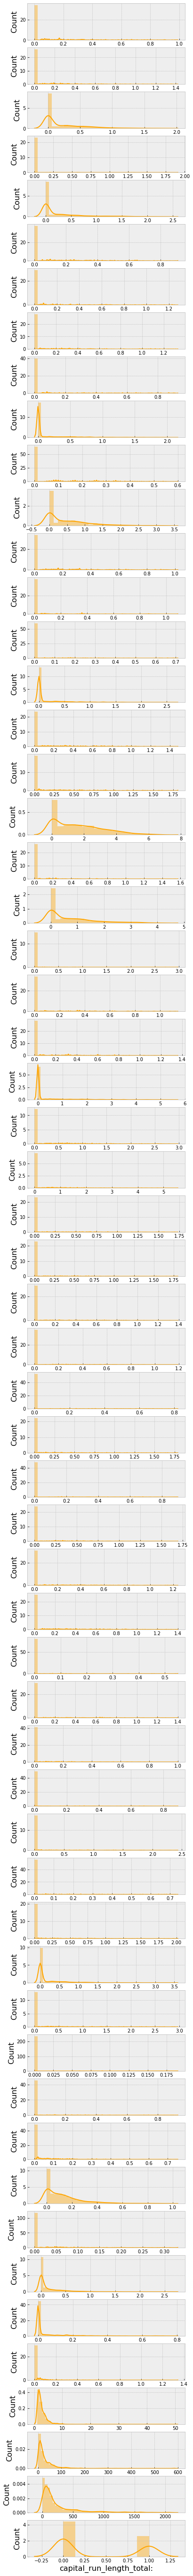

In [ ]:
# Plotting distribution plots for our columns

columns = ['wor1d_freq_make:', 'word_freq_address:', 'word_freq_all:',
       'word_freq_3d:', 'word_freq_our:', 'word_freq_over:',
       'word_freq_remove:', 'word_freq_internet:', 'word_freq_order:',
       'word_freq_mail:', 'word_freq_mail:.1', 'word_freq_receive:',
       'word_freq_will:', 'word_freq_people:', 'word_freq_report:',
       'word_freq_addresses:', 'word_freq_free:', 'word_freq_business:',
       'word_freq_email:', 'word_freq_you:', 'word_freq_credit:',
       'word_freq_your:', 'word_freq_font:', 'word_freq_000:',
       'word_freq_money:', 'word_freq_hp:', 'word_freq_hpl:',
       'word_freq_george:', 'word_freq_650:', 'word_freq_lab:',
       'word_freq_labs:', 'word_freq_telnet:', 'word_freq_857:',
       'word_freq_data:', 'word_freq_415:', 'word_freq_85:',
       'word_freq_technology:', 'word_freq_1999:', 'word_freq_parts:',
       'word_freq_pm:', 'word_freq_direct:', 'word_freq_cs:',
       'word_freq_meeting:', 'word_freq_original:', 'word_freq_project:',
       'word_freq_re:', 'word_freq_edu:', 'word_freq_table:',
       'word_freq_conference:', 'char_freq_;:', 'char_freq_(:', 'char_freq_[:',
       'char_freq_!:', 'char_freq_$:', 'char_freq_#:',
       'capital_run_length_average:', 'capital_run_length_longest:',
       'capital_run_length_total:']

plt.style.use('bmh')

fig, ax = plt.subplots(spam.shape[1], figsize=(6,100))

for i, col_val in enumerate(columns):
  sns.distplot(spam[col_val], hist=True, ax=ax[i], color='orange')
  ax[i].set_xlabel(f"{col_val}", fontsize=16)
  ax[i].set_ylabel('Count', fontsize=16)

plt.show()

In [ ]:
# Determining the standard devation of our data

spam.std()

wor1d_freq_make:                 0.187646
word_freq_address:               0.191433
word_freq_all:                   0.351674
word_freq_3d:                    0.073928
word_freq_our:                   0.466220
word_freq_over:                  0.165501
word_freq_remove:                0.208175
word_freq_internet:              0.202965
word_freq_order:                 0.181642
word_freq_mail:                  0.351249
word_freq_mail:.1                0.102256
word_freq_receive:               0.630204
word_freq_will:                  0.193495
word_freq_people:                0.106804
word_freq_report:                0.077956
word_freq_addresses:             0.425066
word_freq_free:                  0.249723
word_freq_business:              0.329556
word_freq_email:                 1.525972
word_freq_you:                   0.129432
word_freq_credit:                0.924530
word_freq_your:                  0.166769
word_freq_font:                  0.179550
word_freq_000:                   0

In [ ]:
# Calculating the skewness of our data

spam.skew()

wor1d_freq_make:                2.760270
word_freq_address:              3.868618
word_freq_all:                  1.651541
word_freq_3d:                  17.594738
word_freq_our:                  1.865576
word_freq_over:                 2.505623
word_freq_remove:               3.334982
word_freq_internet:             3.590256
word_freq_order:                3.020922
word_freq_mail:                 2.664208
word_freq_mail:.1               3.113573
word_freq_receive:              1.502546
word_freq_will:                 2.812700
word_freq_people:               6.405918
word_freq_report:               6.372799
word_freq_addresses:            2.826239
word_freq_free:                 2.579233
word_freq_business:             2.812713
word_freq_email:                0.769386
word_freq_you:                  6.745409
word_freq_credit:               1.339768
word_freq_your:                11.551340
word_freq_font:                 3.491895
word_freq_000:                  3.840428
word_freq_money:

In [ ]:
# Determining the kurtosis of our data

spam.kurt()

wor1d_freq_make:                 7.348342
word_freq_address:              17.064753
word_freq_all:                   2.547900
word_freq_3d:                  357.917859
word_freq_our:                   3.047562
word_freq_over:                  5.807452
word_freq_remove:               11.174680
word_freq_internet:             13.716991
word_freq_order:                 8.446031
word_freq_mail:                  7.265796
word_freq_mail:.1                9.400727
word_freq_receive:               2.198987
word_freq_will:                  7.796004
word_freq_people:               46.488044
word_freq_report:               44.458105
word_freq_addresses:             8.641759
word_freq_free:                  6.216920
word_freq_business:              7.780569
word_freq_email:                -0.126344
word_freq_you:                  54.480050
word_freq_credit:                1.140452
word_freq_your:                150.469294
word_freq_font:                 12.296571
word_freq_000:                  16

In [ ]:
correlations = spam.corr()

correlations

,wor1d_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,word_freq_mail:.1,word_freq_receive:,word_freq_will:,word_freq_people:,word_freq_report:,word_freq_addresses:,word_freq_free:,word_freq_business:,word_freq_email:,word_freq_you:,word_freq_credit:,word_freq_your:,word_freq_font:,word_freq_000:,word_freq_money:,word_freq_hp:,word_freq_hpl:,word_freq_george:,word_freq_650:,word_freq_lab:,word_freq_labs:,word_freq_telnet:,word_freq_857:,word_freq_data:,word_freq_415:,word_freq_85:,word_freq_technology:,word_freq_1999:,word_freq_parts:,word_freq_pm:,word_freq_direct:,word_freq_cs:,word_freq_meeting:,word_freq_original:,word_freq_project:,word_freq_re:,word_freq_edu:,word_freq_table:,word_freq_conference:,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:
wor1d_freq_make:,1.000000,0.020561,0.081569,0.011968,0.125457,0.057004,0.063362,0.020881,0.069258,0.053346,0.092795,0.088372,0.155230,0.026868,0.056967,0.037906,0.143333,-0.017780,0.165725,0.065058,0.148534,0.064742,0.180301,0.254614,-0.048827,-0.022677,-0.060474,-0.031768,-0.027706,-0.024141,-0.010237,-0.016211,-0.050215,0.018529,0.006603,-0.041260,0.030542,-0.004482,0.020966,0.012428,-0.005285,0.045013,0.002114,-0.010767,-0.055872,-0.019504,0.032463,0.026887,-0.006802,-0.027328,-0.042175,0.124669,0.149658,0.046550,0.035782,0.083342,0.089910,0.106928
word_freq_address:,0.020561,1.000000,0.131574,-0.026265,0.062838,0.024440,0.164546,0.132536,0.037770,0.257440,0.161097,0.030200,0.022695,0.032126,0.206546,0.151020,0.015037,0.320524,0.078444,0.099679,0.148539,0.011828,0.029885,0.079371,-0.039286,-0.060536,-0.043932,-0.064050,-0.051163,-0.046847,-0.028781,0.051888,0.013675,0.013510,-0.036487,-0.021997,-0.014441,-0.002659,0.000184,0.005887,-0.024691,-0.027710,0.022453,-0.055717,-0.020288,-0.040016,-0.013023,-0.017911,-0.034884,-0.050826,-0.047879,0.074560,0.093979,0.043364,0.141392,0.239104,0.133485,0.199497
word_freq_all:,0.081569,0.131574,1.000000,-0.002444,0.138262,0.142770,0.048275,0.039743,0.087867,0.094019,0.113942,0.083957,0.107651,0.029789,0.198648,0.145109,0.126946,0.147209,0.164710,0.102486,0.178303,0.032141,0.139490,0.134509,-0.085449,-0.061365,-0.123104,-0.038366,-0.051826,-0.013707,0.014676,-0.041745,-0.047048,-0.046085,-0.025089,-0.046994,-0.071916,0.017013,-0.039461,0.005218,-0.008988,-0.043882,-0.022133,-0.070967,-0.033836,-0.090526,0.033559,-0.005403,-0.026099,-0.061362,-0.061440,0.216672,0.150459,0.055329,0.115793,0.249853,0.151160,0.234652
word_freq_3d:,0.011968,-0.026265,-0.002444,1.000000,0.015982,-0.028219,0.002401,0.054762,0.021940,0.004691,-0.011369,-0.030199,0.014339,-0.006629,-0.014357,0.093758,-0.005754,0.004012,-0.005435,0.040100,-0.000485,0.015061,0.002454,0.006121,-0.029370,-0.027173,-0.021520,-0.016613,-0.015324,-0.012512,-0.016985,-0.014197,-0.021251,-0.007068,-0.022259,-0.009166,-0.018357,0.027176,-0.018256,-0.010019,-0.010866,-0.016183,-0.007063,-0.014422,-0.036969,-0.022953,-0.004669,-0.009711,0.056551,-0.009490,-0.020502,0.105822,0.049441,0.087205,0.038192,0.022602,0.029219,0.080903
word_freq_our:,0.125457,0.062838,0.138262,0.015982,1.000000,0.156567,0.242040,0.066995,0.040454,0.071440,0.139950,0.058999,0.085093,0.063379,0.044296,0.177426,0.276584,0.050649,0.158908,0.131334,0.246576,0.016599,0.258982,0.100867,-0.112190,-0.068760,-0.062915,-0.037716,-0.013449,-0.043937,-0.027513,0.009432,-0.038229,0.007068,-0.027589,-0.047949,-0.076795,0.008235,-0.043506,0.039602,-0.047957,0.051498,-0.011469,0.013389,-0.068943,-0.128372,0.006345,-0.018618,-0.039238,-0.101332,-0.036272,0.114993,0.179306,0.012565,0.059650,0.106312,0.049913,0.361767
word_freq_over:,0.057004,0.024440,0.142770,-0.028219,0.156567,1.000000,0.108538,0.188856,0.077185,0.061018,0.172488,0.054822,0.191650,0.032079,0.157389,0.056661,0.156106,0.049073,0.128918,0.105862,0.20358

In [ ]:
# Checking for multicollinearity

pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,wor1d_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,word_freq_mail:.1,word_freq_receive:,word_freq_will:,word_freq_people:,word_freq_report:,word_freq_addresses:,word_freq_free:,word_freq_business:,word_freq_email:,word_freq_you:,word_freq_credit:,word_freq_your:,word_freq_font:,word_freq_000:,word_freq_money:,word_freq_hp:,word_freq_hpl:,word_freq_george:,word_freq_650:,word_freq_lab:,word_freq_labs:,word_freq_telnet:,word_freq_857:,word_freq_data:,word_freq_415:,word_freq_85:,word_freq_technology:,word_freq_1999:,word_freq_parts:,word_freq_pm:,word_freq_direct:,word_freq_cs:,word_freq_meeting:,word_freq_original:,word_freq_project:,word_freq_re:,word_freq_edu:,word_freq_table:,word_freq_conference:,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:
wor1d_freq_make:,1.197562,-0.035236,-0.001057,-0.013909,-0.053710,0.050776,-0.042087,0.060164,-0.025420,-0.007011,-0.016856,-0.039041,-0.089732,-0.001325,-0.014408,0.045223,-0.057185,0.066081,-0.105369,0.005185,-0.064823,-0.077213,-0.176410,-0.250888,0.057453,-0.013136,0.032048,0.012943,0.005957,-0.002299,0.014144,0.375832,0.008373,-0.369324,-0.075269,0.001938,-0.069290,0.006475,-0.035385,-0.030008,-0.011817,-0.059582,-0.003884,0.007395,0.067243,0.011006,-0.029218,-0.035530,-0.017782,0.000767,0.030027,-0.116186,-0.037842,0.006910,0.040337,0.019705,-0.010159,0.144096
word_freq_address:,-0.035236,1.341057,-0.049764,0.052228,0.000142,0.070423,-0.015337,-0.095902,0.081939,-0.268308,-0.019556,-0.022655,0.040402,0.021903,-0.090241,-0.062458,0.079322,-0.343832,0.023752,-0.042253,-0.077418,0.017604,0.082535,0.026481,-0.100597,0.067460,0.031220,0.111876,0.043143,0.028265,0.130167,-0.615069,-0.082829,0.367409,-0.026652,-0.012071,-0.025467,0.035221,-0.005478,0.096178,-0.004100,-0.015805,-0.057046,0.039368,-0.020846,0.023231,0.015439,-0.007657,0.016674,0.030170,0.105408,0.065860,-0.009162,-0.017412,-0.014021,-0.131013,-0.009407,-0.103615
word_freq_all:,-0.001057,-0.049764,1.215963,0.026591,-0.068165,-0.077652,0.118296,0.080791,0.017671,-0.016649,0.020759,-0.068716,-0.028606,0.013029,-0.145086,-0.023713,-0.042456,-0.056837,-0.075347,-0.005809,-0.042343,-0.004898,0.003855,-0.008124,0.050283,0.003565,0.095373,-0.010210,0.003193,-0.029571,-0.119474,-0.004855,-0.016757,0.090811,0.000264,0.032155,0.013058,-0.023318,0.018588,-0.013316,-0.032041,0.024541,-0.046653,0.059717,-0.015735,0.070040,-0.029407,-0.026349,-0.032418,0.008595,0.039348,-0.169501,-0.037143,-0.013955,0.045505,-0.166401,-0.001934,-0.032473
word_freq_3d:,-0.013909,0.052228,0.026591,1.048641,-0.010100,0.031538,0.037803,-0.071404,-0.005542,-0.013875,0.048438,0.014699,-0.028855,0.028541,0.042610,-0.074229,0.043972,-0.008225,0.008260,-0.041096,0.029158,0.040208,0.033984,0.024208,0.002928,0.016216,0.007277,-0.000776,0.002667,-0.022597,-0.001435,0.010904,0.008363,-0.034188,0.005401,0.007202,0.012879,-0.023193,0.014264,0.028893,0.002454,0.009803,-0.031406,0.004221,0.033107,0.003527,0.006736,-0.000563,-0.078376,0.011952,0.029584,-0.074841,-0.017641,-0.097196,0.005074,-0.008525,-0.007318,-0.068849
word_freq_our:,-0.053710,0.000142,-0.068165,-0.010100,1.330743,-0.047584,-0.141553,0.049644,0.027168,-0.024809,-0.051714,-0.015673,-0.039287,-0.028355,0.071998,-0.028341,-0.189185,0.051660,-0.058030,-0.065009,-0.075932,0.029824,-0.158217,0.093482,0.078599,-0.052409,-0.010097,-0.039535,-0.034622,0.001892,0.024923,-0.102168,-0.028919,0.023776,-0.034893,0.032684,-0.028755,-0.012883,0.031617,-0.008238,0.003197,-0.137142,-0.001772,-0.089065,0.039577,0.060885,-0.008328,-0.016110,0.005040,0.075616,-0.008472,0.068966,-0.015274,0.048192,0.044148,0.025706,0.033881,-0.349163
word_freq_over:,0.050776,0.070423,-0.077652,0.031538,-0.047584,1.244820,-0.023284,-0.127235,0.013037,0.014051,-0.068098,-0.004384,-0.119791,0.064345,-0.041468,0.041657,

In [ ]:
df = spam.drop(columns=['word_freq_labs:',	'word_freq_telnet:',	'word_freq_857:',	'word_freq_data:', 'word_freq_415:'])

revised = df.corr()

pd.DataFrame(np.linalg.inv(revised.values), index = revised.index, columns=revised.columns)

,wor1d_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,word_freq_mail:.1,word_freq_receive:,word_freq_will:,word_freq_people:,word_freq_report:,word_freq_addresses:,word_freq_free:,word_freq_business:,word_freq_email:,word_freq_you:,word_freq_credit:,word_freq_your:,word_freq_font:,word_freq_000:,word_freq_money:,word_freq_hp:,word_freq_hpl:,word_freq_george:,word_freq_650:,word_freq_lab:,word_freq_85:,word_freq_technology:,word_freq_1999:,word_freq_parts:,word_freq_pm:,word_freq_direct:,word_freq_cs:,word_freq_meeting:,word_freq_original:,word_freq_project:,word_freq_re:,word_freq_edu:,word_freq_table:,word_freq_conference:,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:
wor1d_freq_make:,1.180906,-0.017623,0.001328,-0.014830,-0.052487,0.048551,-0.040386,0.057356,-0.026780,-0.007827,-0.022818,-0.038153,-0.088659,-0.004438,-0.014522,0.041666,-0.059179,0.062809,-0.109068,0.014476,-0.063243,-0.072872,-0.169935,-0.240166,0.049411,-0.025175,0.029294,-0.016914,0.012485,-0.008200,0.004182,-0.080292,0.009141,-0.030750,-0.024681,-0.011326,-0.064179,0.001690,0.005736,0.067656,0.015334,-0.028222,-0.036987,-0.010144,0.001090,0.029770,-0.121486,-0.047855,-0.001729,0.041074,0.010323,-0.004788,0.146373
word_freq_address:,-0.017623,1.294440,-0.044901,0.052467,-0.010190,0.076139,-0.023231,-0.088341,0.082176,-0.259185,-0.010226,-0.019486,0.040376,0.026250,-0.091179,-0.046431,0.083632,-0.325400,0.031952,-0.050645,-0.085270,0.015080,0.077053,0.013056,-0.093072,0.063265,0.000411,0.095708,0.014310,0.037515,-0.002642,-0.019359,0.029907,-0.012607,0.016054,-0.005512,-0.009965,-0.099762,0.034405,-0.028711,0.020146,0.012344,-0.010718,0.004798,0.020530,0.094468,0.072033,0.007094,-0.012901,-0.019151,-0.124449,-0.013342,-0.104811
word_freq_all:,0.001328,-0.044901,1.208052,0.027337,-0.067164,-0.078284,0.119226,0.081078,0.019299,-0.016905,0.019731,-0.065176,-0.028210,0.012109,-0.144271,-0.025504,-0.037816,-0.067462,-0.073687,-0.005577,-0.047457,-0.005718,0.000978,-0.010742,0.040978,-0.004102,0.100716,-0.015677,0.006719,-0.047990,0.015662,0.013516,-0.024658,0.019078,-0.010856,-0.030254,0.019612,-0.035415,0.060096,-0.010331,0.070521,-0.029091,-0.024184,-0.030142,0.007125,0.037462,-0.168100,-0.035486,-0.013379,0.046624,-0.160902,-0.007203,-0.026350
word_freq_3d:,-0.014830,0.052467,0.027337,1.048307,-0.010258,0.032046,0.038297,-0.071094,-0.004423,-0.013850,0.048386,0.014980,-0.029284,0.028140,0.042397,-0.074389,0.044287,-0.007717,0.006431,-0.040373,0.028478,0.039993,0.034064,0.024435,0.003212,0.016351,0.005184,0.000171,0.000411,-0.023490,0.005457,0.012150,-0.022899,0.013048,0.018795,0.002975,0.010761,-0.036180,0.004687,0.031770,0.003792,0.006896,0.000990,-0.077830,0.011626,0.030884,-0.075650,-0.018539,-0.097101,0.005103,-0.009171,-0.006816,-0.069066
word_freq_our:,-0.052487,-0.010190,-0.067164,-0.010258,1.327447,-0.046185,-0.143525,0.051680,0.027576,-0.021673,-0.050504,-0.013228,-0.038981,-0.028121,0.071744,-0.023966,-0.186957,0.055091,-0.056467,-0.064726,-0.079870,0.030070,-0.158769,0.091487,0.076430,-0.059965,-0.022093,-0.057296,-0.043119,-0.001495,0.032447,-0.030333,-0.014144,0.030233,-0.039531,0.003453,-0.137437,-0.014932,-0.091258,0.037564,0.061429,-0.009005,-0.016771,0.003972,0.071675,-0.012585,0.069515,-0.012450,0.047085,0.042733,0.026060,0.033185,-0.347474
word_freq_over:,0.048551,0.076139,-0.078284,0.032046,-0.046185,1.242534,-0.022843,-0.129757,0.010259,0.013456,-0.069737,-0.005812,-0.118744,0.064805,-0.040748,0.040682,-0.036592,0.015549,-0.050029,-0.020321,-0.116435,0.016415,-0.125704,-0.117665,0.017627,0.048451,0.021319,0.005250,0.018732,-0.056133,0.017633,-0.009969,0.071682,0.016632,-0.005985,-0.040855,0.023915,-0.060228,0.015289,0.049891,0.050048,-0.022777,-0.003071,-0.018121,-0.004814,-0.006254,0.202390,0.010135,-0.012928,0.09

## Implementing the solution



In [ ]:
# Since we have cleaned our data, we can then use it to create our model
# We will first split in to features and labels

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
# Descibing our data

spam.describe()

,wor1d_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,word_freq_mail:.1,word_freq_receive:,word_freq_will:,word_freq_people:,word_freq_report:,word_freq_addresses:,word_freq_free:,word_freq_business:,word_freq_email:,word_freq_you:,word_freq_credit:,word_freq_your:,word_freq_font:,word_freq_000:,word_freq_money:,word_freq_hp:,word_freq_hpl:,word_freq_george:,word_freq_650:,word_freq_lab:,word_freq_labs:,word_freq_telnet:,word_freq_857:,word_freq_data:,word_freq_415:,word_freq_85:,word_freq_technology:,word_freq_1999:,word_freq_parts:,word_freq_pm:,word_freq_direct:,word_freq_cs:,word_freq_meeting:,word_freq_original:,word_freq_project:,word_freq_re:,word_freq_edu:,word_freq_table:,word_freq_conference:,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:
count,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000
mean,0.080705,0.066252,0.244225,0.005756,0.293082,0.074127,0.073617,0.071614,0.066053,0.161483,0.036563,0.503476,0.082202,0.022965,0.015382,0.197083,0.108192,0.139378,1.669217,0.027273,0.741867,0.018347,0.059208,0.054307,0.405654,0.157701,0.146223,0.066407,0.039315,0.049810,0.024526,0.016053,0.060365,0.016704,0.048974,0.063641,0.103379,0.003802,0.034925,0.023029,0.009713,0.047287,0.025649,0.051609,0.230073,0.118318,0.000384,0.017064,0.022089,0.131823,0.012039,0.191031,0.050578,0.015641,2.753823,33.322314,257.588721,0.373359
std,0.187646,0.191433,0.351674,0.073928,0.466220,0.165501,0.208175,0.202965,0.181642,0.351249,0.102256,0.630204,0.193495,0.106804,0.077956,0.425066,0.249723,0.329556,1.525972,0.129432,0.924530,0.166769,0.179550,0.167148,0.887549,0.414386,0.505402,0.234041,0.163704,0.174976,0.112484,0.088079,0.221269,0.090550,0.171392,0.187422,0.246039,0.035343,0.149021,0.096439,0.069633,0.227612,0.104961,0.211012,0.476979,0.401548,0.006407,0.088438,0.065894,0.153313,0.040386,0.345039,0.114744,0.062559,2.368260,54.425758,343.441760,0.483814
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.583000,8.000000,55.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000,0.000000,0.390000,0.00000

In [ ]:
# Creating the training and test sets from our data
# We wil start with a ratio of 80/20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# We will use multinomial naive bayes since our data is continuous

# We will now fit our model and initiate the classifier

model = MultinomialNB().fit(X_train, y_train)

In [ ]:
# We will then evaluate the performance of our model on our data

predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.7354368932038835


For our average of 0.3733, the prediction surely shows that our model has some lot of errors.

We will try using different partition ratios for our data.

In [ ]:
# Using a ratio of 70/30 while creating our training and tests sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fitting the algorithm into our model
model = MultinomialNB().fit(X_train, y_train)

# Evaluating the performance of our model on our data

predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.7378640776699029


In [ ]:
# Using a ratio of 60/40 while creating our training and tests sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Fitting the algorithm into our model
model = MultinomialNB().fit(X_train, y_train)

# Evaluating the performance of our model on our data

predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.7594167679222357


From our analysis, we have observed that an increase in the test size leads to higher mean squared error which shows that our model is becoming more inaccurate.

## Challenging the solution.

## Follow-up Questions

### a). Did we have the right data?

> From our analysis, we can conclude that we did have the right data

### b). Do we need other data to answer our question?

> We believe that some information from the columns may be missing. Our data also happened to have a large number of outliers.

### c). Did we have the right question?

> We did have the right question for this data which was to classify the type of emails received.